In [1]:
import pandas as pd
import numpy as np  

#Data read

In [7]:
train_x = np.load('data/train_x.npy')
test_x = np.load('data/test_x.npy')
val_x = np.load('data/valid_x.npy')
train_y = np.load('data/train_y.npy')
test_y = np.load('data/test_y.npy')
val_y = np.load('data/valid_y.npy')

In [35]:
import matplotlib.pyplot as plt

# Load numpy array from file
img = train_x[0]
img = img.transpose(1, 2, 0) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


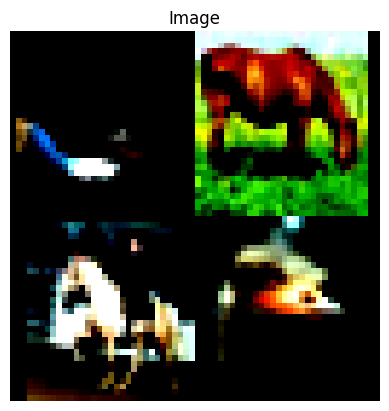

In [36]:
# Plot image
plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()